# Práctica 02: Regresión Logística

In [243]:
import numpy as np
from pandas.io.parsers import read_csv
from matplotlib import pyplot as plt
import scipy.optimize as opt

In [244]:
def load_csv(file_name):
    values = read_csv(file_name,header=None).values
    return values.astype(float)

In [245]:
data = load_csv("data/ex2data1.csv")

In [246]:
X = data[:,:-1] # Features
Y = data[:, -1] # Target
m = np.shape(X)[0] # number of rows

In [247]:
print("#" * 50)
print(data[:5])
print("#" * 50)
X=np.hstack([np.ones([m,1]), X])
print(X[:5])
print("#" * 50)
print(Y[:5])

##################################################
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]
##################################################
[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]
##################################################
[0. 0. 0. 1. 1.]


## 1.1 Visualización de Datos

In [248]:
# Obtiene un vector con los índices  de  los  ejemplos  positivos
pos_pass = np.where(Y == 1)
pos_fail = np.where(Y == 0)

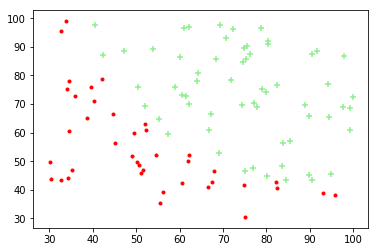

In [249]:
#Dibuja los ejemplos positivos
plt.scatter(X[pos_pass, 1], X[pos_pass, 2], marker ="+", c="lightgreen")
plt.scatter(X[pos_fail, 1], X[pos_fail, 2], marker =".", c="red")

## 1. 2 Función Sigmoide

In [250]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

## 1.3 Cálculo de la función de coste y su gradiente

In [251]:
def cost(thetas, X, Y):
    sigmoid_X_theta = sigmoid(np.matmul(X,thetas))
    
    term_1 = np.matmul(np.transpose(np.log(sigmoid_X_theta)), Y)
    
    term_2 = np.matmul(np.transpose(np.log((1- sigmoid_X_theta))),(1-Y))
    
    return - (term_1 + term_2) / np.shape(X)[0]

In [252]:
def gradient(thetas, X, Y):
    sigmoid_X_theta = sigmoid(np.matmul(X,thetas))
    
    return np.matmul(np.transpose(X),(sigmoid_X_theta - Y)) /  np.shape(X)[0]
    

In [253]:
thetas = np.zeros(np.shape(X)[1])

In [255]:
thetas

array([0., 0., 0.])

In [256]:
cost(thetas, X, Y)

0.6931471805599452

In [257]:
gradient(thetas, X, Y)

array([ -0.1       , -12.00921659, -11.26284221])

## 1.4 Cálculo del valor óptimo de los parámetro

In [258]:
result = opt.fmin_tnc(func=cost, x0= thetas, fprime=gradient, args=(X,Y))
theta_opt = result[0]

In [259]:
cost(theta_opt,X,Y)

0.20349770158947492

In [260]:
def pinta_frontera_recta(X, Y, theta):
    plt.figure()
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))
    h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)),
    xx1.ravel(),
    xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)
    # el cuarto parámetro es el valor de z cuya frontera se
    # quiere pintar
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    plt.savefig("frontera.pdf")
    plt.close()

In [261]:
pinta_frontera_recta(X,Y,theta_opt)

/home/manuelmonforte/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


## 1.5 Evaluación de la regresión logística

In [281]:
print(sigmoid(np.matmul(np.transpose(theta_opt),X[0])))

0.09103392917859199


In [270]:
X[0]

array([ 1.        , 34.62365962, 78.02469282])

In [316]:
def predict(X,Y):
    Y_pred = []
    correct, incorrect = 0, 0
    for i in range(np.shape(X)[0]):
        Y_pred.append(round(sigmoid(np.matmul(np.transpose(theta_opt),X[i]))))
    return Y_pred 
    

In [317]:
predict(X,Y)

[0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0]

In [321]:
def get_acurracy(Y, Y_pred):
    return (Y == np.array(Y_pred))

In [322]:
get_acurracy(Y, predict(X, Y)).c

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True])